# K - Means Clustering

### Context
k-means is an unsupervised machine learning algorithm used to find groups of observations (clusters) that share similar characteristics. What is the meaning of unsupervised learning? It means that the observations given in the data set are unlabeled, there is no outcome to be predicted. We are going to use a Wine data set to cluster different types of wines. This data set contains the results of a chemical analysis of wines grown in a specific area of Italy.

### About Dataset

1. Relevant Information:

   -- This data is the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 
### Attributes

 	1) Alcohol
    
 	2) Malic acid
 	
    3) Ash
	
    4) Alcalinity of ash  
 	
    5) Magnesium
	
    6) Total phenols
 	
    7) Flavanoids
 	
    8) Nonflavanoid phenols
 	
    9) Proanthocyanins
	
    10)Color intensity
 	
    11)Hue
 	
    12)OD280/OD315 of diluted wines
 	
    13)Proline            

### 2. Number of Instances
    class 1 59
    class 2 71
    class 3 48

### 3. Number of Attributes 
	13

	NOTE: 1st attribute is class identifier (1-3)

### 4. Missing Attribute Values:

	None

### 5. Class Distribution: number of instances per class

    class 1 59
	class 2 71
	class 3 48

___
# Your Job 
___

***Things to do***
- Perform the data pre-processing.
- Perform EDA
- Fit K-Means Clustering algorithm using a random value of K
- Fit and evaluate your model
- Determine the optimal value of K in K-Means Clustering
- Fit the model with the new value of K
 
***What will be new***
- You will learn the K-Means clustering algorithm.
- How to determine the optimal value of K in K-Means Clustering
 
***What will be tricky***
- Determining the optimal value of K in K-Means Clustering might be tricky, what you can do is, you can use elbow method. You can find a [tutorial on elbow method here.](https://www.geeksforgeeks.org/ml-determine-the-optimal-value-of-k-in-k-means-clustering/)


> Note: No need to standardize.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('wine.csv')
df.columns=['Class', 'Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
            'Color intensity','Hue','OD280/OD315 of diluted wines','Proline' ]

In [7]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## EDA

IndexError: list index out of range

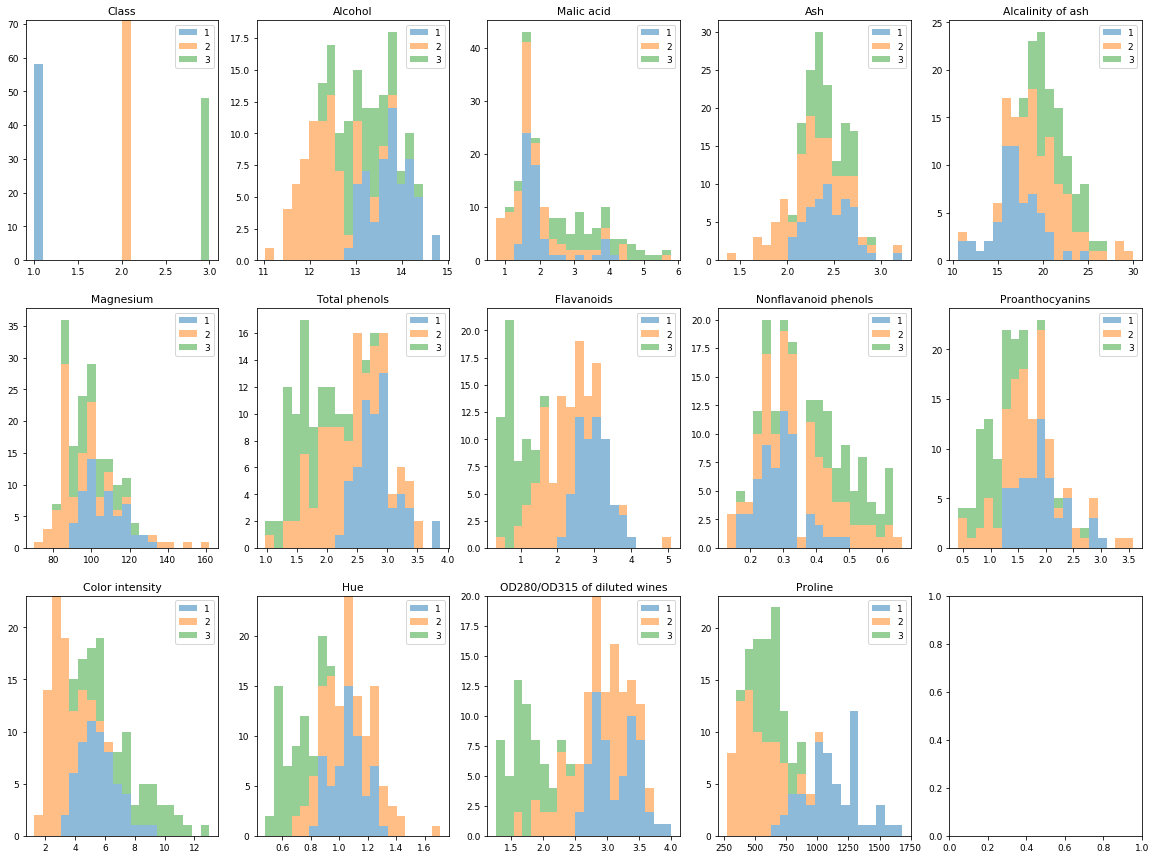

In [11]:
features_list=list(df.columns)

# split dataframe into 4 based on label
df1 = df[df['Class'] ==1]
df2 = df[df['Class'] ==2]
df3 = df[df['Class'] ==3]

#Stack the data
plt.rcParams.update({'font.size': 9})
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,15))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
   
    ax.hist([df1[features_list[idx]],df2[features_list[idx]],df3[features_list[idx]]], bins=20, alpha=0.5,stacked=True, label=['1','2','3'],
            color=['tab:blue','tab:orange','tab:green'])
    ax.legend(loc='upper right')
    ax.set_title(features_list[idx]) 

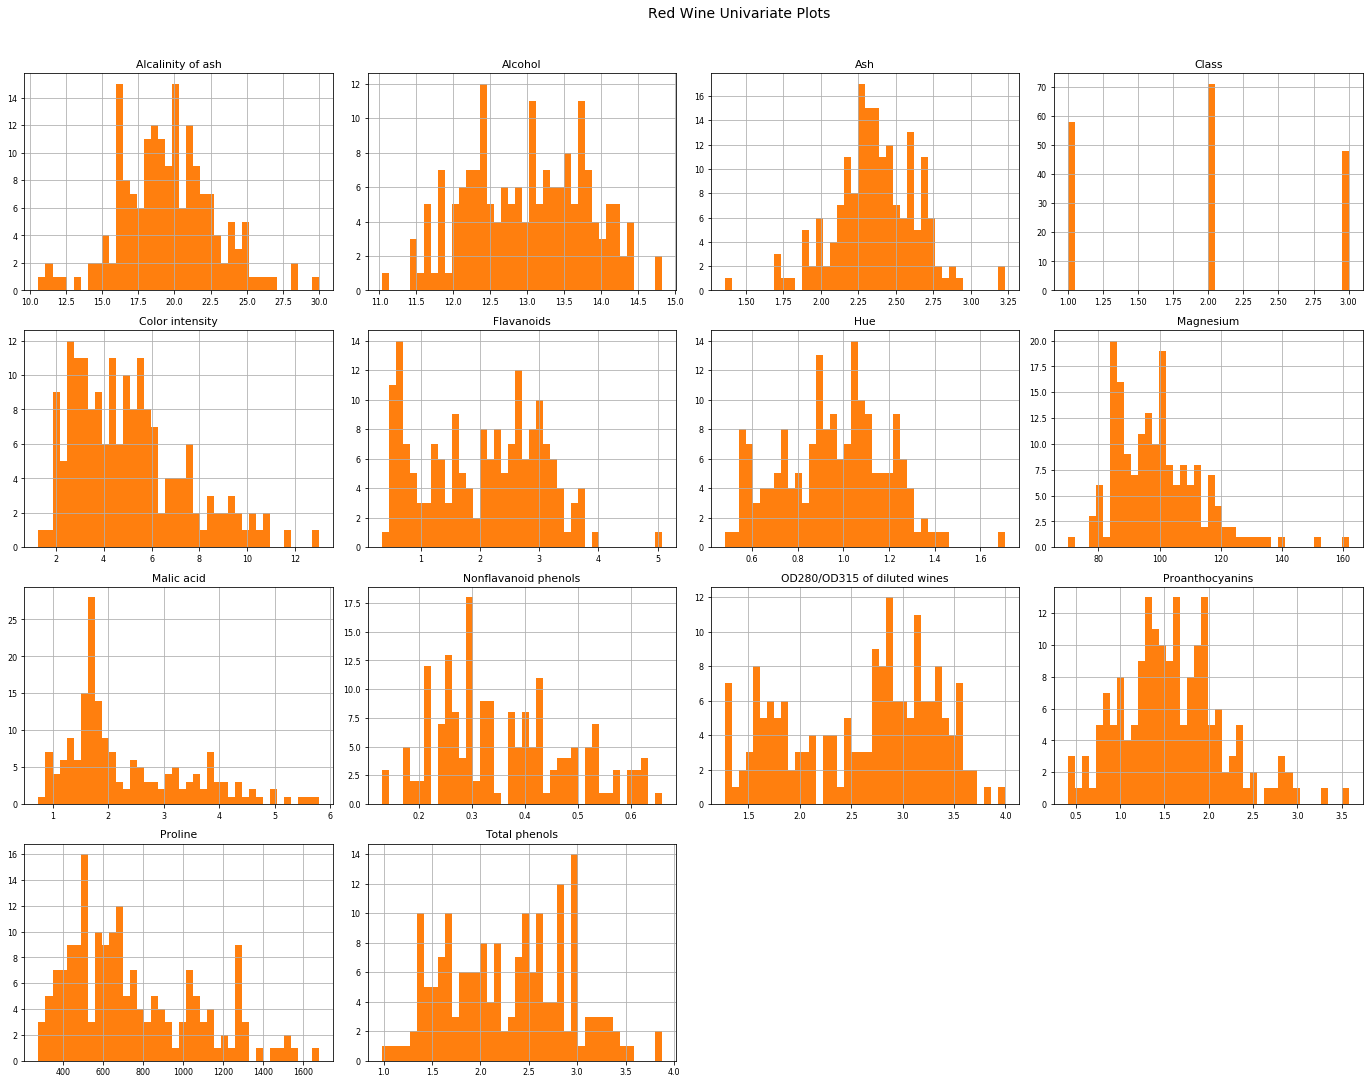

In [12]:
df[features_list].hist(bins=40, linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=True, 
                          figsize=(16,12), color='tab:orange')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=14);  

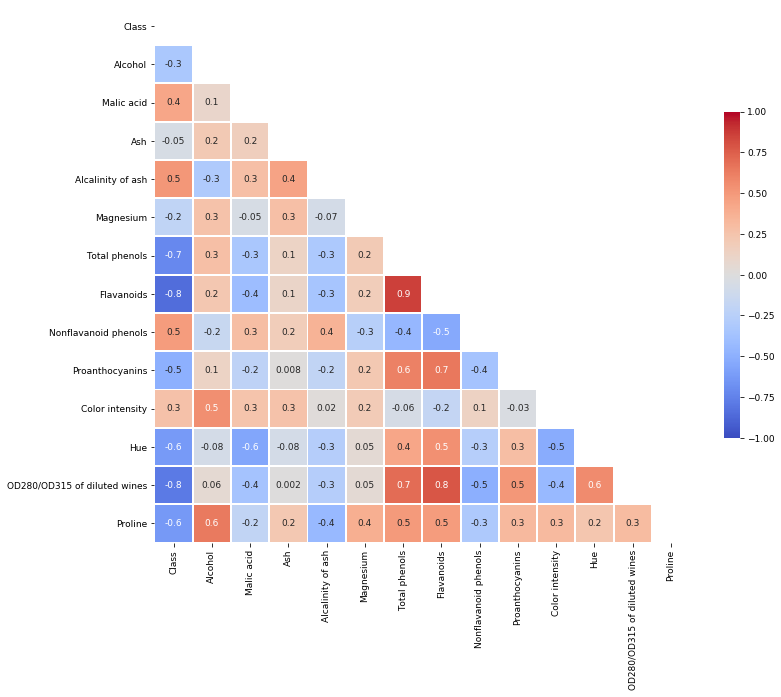

In [13]:

fig, ax = plt.subplots(figsize=(12,12))  
mask = np.triu(df.corr())

sns.heatmap(df.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='white', square=True, mask = mask, cbar=True, cbar_kws={"shrink": .5}, annot=True, fmt='.1g')


## Clustering the Data

### Standardizing the data

In [14]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_cluster=df.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

### Clustering - method 1

In [15]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the input data
kmeans = kmeans.fit(data_cluster)

# Getting the cluster labels
labels = kmeans.predict(data_cluster)

# Centroid values
centroids = kmeans.cluster_centers_

print(centroids)

[[-1.17927868  0.87928462 -0.3028753   0.32084486 -0.66341812  0.55745999
   0.88135057  0.94817179 -0.58715101  0.57881739  0.16676126  0.48660837
   0.76475594  1.16659806]
 [ 0.07320166 -0.91696953 -0.38133141 -0.46314069  0.16907861 -0.46296088
  -0.06929693  0.050145    0.00502647  0.0252214  -0.8585881   0.42550733
   0.26203024 -0.75959526]
 [ 1.34242874  0.1958541   0.90006232  0.2498546   0.57770902 -0.04012775
  -0.98303762 -1.23061567  0.7119849  -0.74375711  0.98731255 -1.18634695
  -1.30006964 -0.37435522]]


### Optimization of the n cluster: Inertia / Silhouette

In [16]:
inertia = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=15,max_iter=500)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)

In [17]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

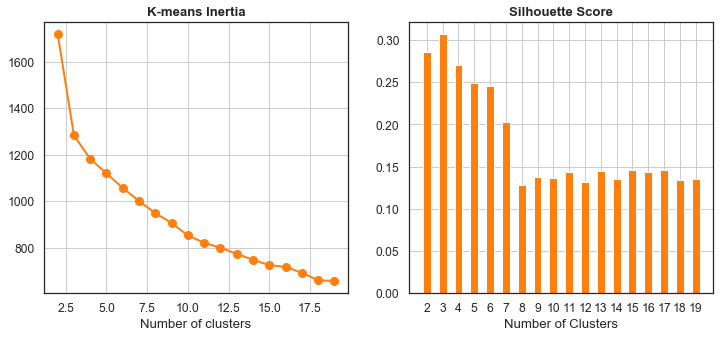

In [18]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='tab:orange')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'tab:orange',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid(True)
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

In [19]:
kmeans = KMeans(n_clusters=3,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
pd.Series(kmeans_labels).value_counts()

2    68
0    60
1    49
dtype: int64

### Optimization of the n cluster: Elbow method

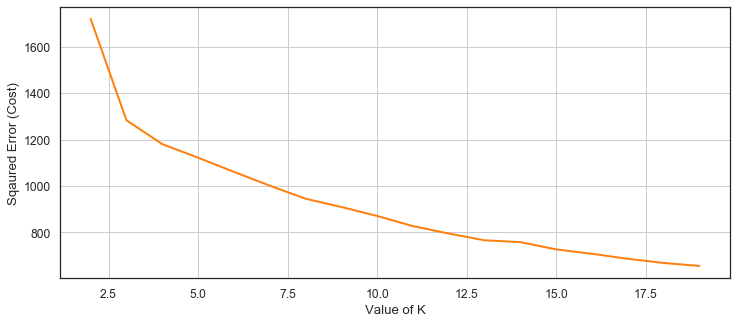

In [20]:
cost =[] 

for i in range(2, 20): 
    kmeans = KMeans(n_clusters = i, max_iter = 500) 
    kmeans.fit(data_cluster) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(kmeans.inertia_)      
  
# plot the cost against K values 
plt.plot(range(2,20), cost, color ='tab:orange', linewidth ='2') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.grid(True)
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

### Visualization

In [21]:
#  for visualisation, we just plot 2 columns (kind of randomly)

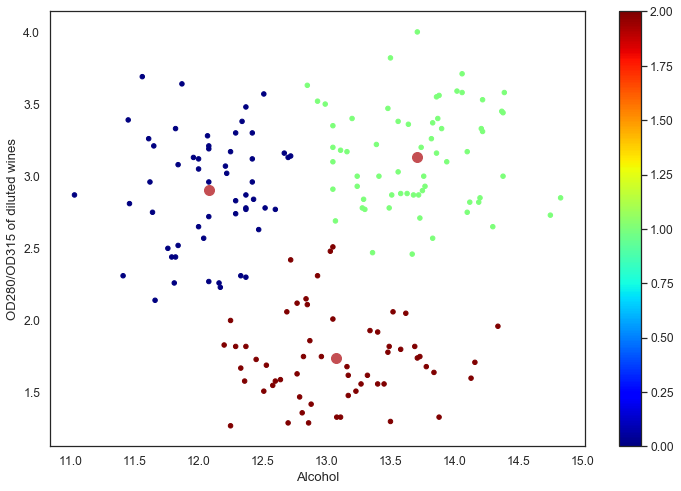

In [26]:
from sklearn.cluster import KMeans

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 15)
kmeans = kmeans.fit(df.iloc[:,[12,1]])

# creating the centroids df
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(df.iloc[:,[12,1]].columns.values))

# creating the plot
fig, ax = plt.subplots(1, 1)
df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Alcohol', y = 'OD280/OD315 of diluted wines', ax = ax,  s = 100, mark_right=False, c='r')

### Putting back into the df the Cluster group

In [ ]:
# Methodology is to use distance in order to define the cluster group

In [32]:
# example of distance calc
dist = np.linalg.norm(kmeans.cluster_centers_[0])
dist

12.423722811455017

In [33]:
# Coordinates of the centroids
pd.DataFrame(kmeans.cluster_centers_)

,0,1
0,2.902909,12.079818
1,3.133281,13.706094
2,1.737414,13.074138


In [40]:
def find_cluster(centers, value):
    dist0 = np.linalg.norm(centers[0]-value)
    dist1 = np.linalg.norm(centers[1]-value)
    dist2 = np.linalg.norm(centers[2]-value)
    
    distance = min_of_three(dist0,dist1,dist2)
    return distance
    
    
def min_of_three(x,y,z):
    if (x<y) and (x<z):
        return 0
    elif (y<x) and (y<z):
        return 1
    elif (z<x) and (z<y):
        return 2
 

value_df = df.iloc[:,[1,12]]    

# I took the values from the graph to see if my function is working. And it's working pretty fine.
print(find_cluster(kmeans.cluster_centers_, (0.8,12.2)))
print(find_cluster(kmeans.cluster_centers_, (3.3,13.5)))
print(find_cluster(kmeans.cluster_centers_, (3.7,11.7)))


print(find_cluster(kmeans.cluster_centers_, value_df.iloc[12]))

2
1
0
0


In [43]:
df['cluster'] = df.apply(find_cluster(kmeans.cluster_centers_, value_df), axis = 1)

TypeError: 'int' object is not callable